# GSLC MACHINE LEARNING 2 : CUSTOMER SEGMENTATION

# Marketing Problems : Predicting Customer Segmentation for New Markets

The Steps to train and test the dataset for customer segmentation is shown below:
1. Export The Datasets,Libraries
2. Anaylze it (EDA)
3. Data Preprocessing
4. Build The Model
5. Train And Test
6. Evaluation To Improve And Predictions

# Library Import

In [35]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Correlation test
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as mp
import seaborn as sns

# visualization libraries
import plotly
import plotly.express as px
import plotly.graph_objects as gro
from plotly.subplots import make_subplots
import random #this will be used to generate color

#sklearn libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, recall_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

#Machine learning libraries
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


# tau ga kenapa random forest sama Gradient Boosting putus ?
# Karena random forest cannot handle the "weight" ( BONUS 5 )

# EDA

In [4]:
customer_dataset = pd.read_csv("/Users/aaron/Documents/Semester 3/Machine Learning/GSLC ML 2/train.csv")
test_dataset = pd.read_csv("/Users/aaron/Documents/Semester 3/Machine Learning/GSLC ML 2/test.csv")
customer_dataset

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [5]:
# pertama kita liat setiap unique values yang ada di dataset kita
for column in customer_dataset.columns:
    unique_values = customer_dataset[column].nunique()
    print(f"{column}: {unique_values}")

ID: 8068
Gender: 2
Ever_Married: 2
Age: 67
Graduated: 2
Profession: 9
Work_Experience: 15
Spending_Score: 3
Family_Size: 9
Var_1: 7
Segmentation: 4


In [6]:
print(customer_dataset.dtypes)

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object


# What Are we gonna do to each column
1. ID: Unique identification number for each customer (categorical, acts as a key, not used for prediction).
2. Gender: Gender of the customer (Categorical -> Binary, 1 = Male, 0 = Female).
3. Ever_Married: Marital status of the customer (Categorical -> Binary, 1 = Yes, 0 = No).
4. Age: Age of the customer (Numeric, in years).
5. Graduated: Whether the customer has completed university education or not (Categorical -> Binary, 1 = Yes, 0 = No).
6. Profession: Occupation of the customer (Categorical).
7. Work_Experience: Years of work experience (Numeric,years).
8. Spending_Score: Customer's spending habits (Categorical -> Ordinal, Low = 0, Average = 1, High = 2).
9. Family_Size: Total number of family members (Numeric).
10. Var_1: categorical attribute (Categorical).
11. Y / Segmentation: Customer segmentation category (Categorical -> Target, A/B/C/D, based on customer traits).

In [7]:
# Check duplicates
customer_dataset.duplicated().sum()

0

karena ga ada duplicate jadi lanjut check NA

In [8]:
# drop kolom id karena dia key jadi ga berguna untuk analisa machine kita nanti
customer_dataset.drop(["ID"], axis="columns", inplace=True)
test_dataset.drop(["ID"], axis="columns", inplace=True)
customer_dataset

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [9]:
# Check NA dan Percentage
customer_dataset.isna().sum()
percentage_na = customer_dataset.isna().sum()/len(customer_dataset)
print(percentage_na*100)

Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64


karena rata-rata dibawah 10% dan ada yang melebihi 10% sedikit jadi ini masih aman untuk kita drop. Lagipula kalau pun diatas 10% kita juga susah untuk mengubah data tsb karena nantinya jadi tidak efektif untuk model kita. Kalau di atas 10% dan jauh bgt mau ga mau ganti dataset satu lagi untungnya ga 

In [10]:
customer_dataset_clean = customer_dataset.dropna()
test_dataset_clean = test_dataset.dropna()

In [11]:
numeric_data = customer_dataset_clean.select_dtypes(include=[np.number])
numeric_data

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
2,67,1.0,1.0
3,67,0.0,2.0
5,56,0.0,2.0
6,32,1.0,3.0
...,...,...,...
8062,41,0.0,5.0
8064,35,3.0,4.0
8065,33,1.0,1.0
8066,27,1.0,4.0


# Data Visualization

In [12]:
# untuk menghasilkan warna random untuk tiap grafik dan juga untuk tiap unique value yang berbeda kalau ordinal
def generate_random_colors(num_colors):
    return [f'rgba({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)}, 1)' for _ in range(num_colors)]

def plot_numerical(data):
    for column in data.columns:
        # membuat subplot agar bisa 2 plot bersampingan di sini 1 row dan 2 kolom
        graphic = make_subplots(rows=1, cols=2, subplot_titles=(f"Histogram of {column}", f"Boxplot of {column}"))

        # Menambahkan Visualisasi Histogram
        graphic.add_trace(
            gro.Histogram(x=data[column], marker=dict(color=generate_random_colors(1)[0])),
            row=1, col=1
        )
        # Menambahkan Visualisasi Boxplot
        graphic.add_trace(
            gro.Box(y=data[column], marker=dict(color=generate_random_colors(1)[0])),
            row=1, col=2
        )

       # ngebuat title untuk satu keseluruhan boxplot dan histogram
        graphic.update_layout(title=f"Distribution Visualization and Outliers Checking of {column}", showlegend=False)
        graphic.show()

# ini hanya untuk plot yang numerical
plot_numerical(numeric_data)

dari visualisasi di atas kita dapat melihat bahwa kolom numerik ada 3 :
Outliers:
- Age, untuk kolom age ada sedikit outlier sebanyak 3, hal ini akan kita biarkan saja karena mengingat wajar untuk memiliki umur 87-89 dan juga outliernya sedikit jadi ya udah kita biarin aja untuk kolom ini
- working experience dinotasikan dalam tahun disini ada 4 outlier dr 11-14, sekali lagi ini wajar aja untuk menjadi outlier mengingat seseorang yang sudah kerja lama dengan suatu perusahaan atau dengan seseorang yang umurnya sudah tua pasti working experiencenya lama. jadi kita biarin aja untuk working experience.
- Family size , demikian juga dengan family size satu keluarga beranggotakan 8-9 masih wajar dianggap sehingga ini kita biarin aja.
Distribusi:
- Age : untuk age data aga skewed ke kiri namun tidak terlalu skewed yang parah karena data masih tersebar juga di tengah dan kanan
- work experience : data sangat skewed ke kiri, tapi ga ada yang bisa kita lakuin juga sih karena kalau kita ngubah data nanti jadi kehilangan uniqueness dari data itu sendiri dan ga valid
- family size : sama seperti age data skewed ke kiri tapi tidak terlalu karena masih ada data yang tersebar di tengah dan kanan walaupun sedikit

In [13]:
categorical_data = customer_dataset_clean.select_dtypes(exclude=[np.number])
categorical_data

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
2,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,Male,Yes,Yes,Lawyer,High,Cat_6,B
5,Male,Yes,No,Artist,Average,Cat_6,C
6,Male,No,Yes,Healthcare,Low,Cat_6,C
...,...,...,...,...,...,...,...
8062,Male,Yes,Yes,Artist,High,Cat_6,B
8064,Male,No,No,Executive,Low,Cat_4,D
8065,Female,No,Yes,Healthcare,Low,Cat_6,D
8066,Female,No,Yes,Healthcare,Low,Cat_6,B


In [1]:
# ini untuk warna ya biar cantik :)
def generate_random_colors(num_colors):
    return [f'rgba({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)}, 1)' for _ in range(num_colors)]

# function ordrinal beda ama numerical
def plot_ordinal(data):
    # looping per kolom
    for column in data.columns:
        # Menghitung frekuensi dari setiap nilai unik di kolom ordinal
        value_counts = data[column].value_counts().reset_index()
        value_counts.columns = ['value', 'count']
        
        # Generate warna acak untuk setiap bar (terlepas dari unique value)
        random_colors = generate_random_colors(len(value_counts))
        
        # Membuat Bar Chart dengan warna berbeda untuk setiap bar
        graphic = px.bar(value_counts, 
                     x='value', 
                     y='count',
                     title=f'Bar Chart of {column}', 
                     labels={'value': column, 'count': 'Count'})
        
       # ngeapply warna ke barnya
        graphic.update_traces(marker_color=random_colors)
        
        # Menampilkan grafik
        graphic.show()


plot_ordinal(categorical_data)

NameError: name 'categorical_data' is not defined

dari bar chart di atas kita dapat melihat distribusi dari setiap kolom categorical :
- Gender = dari gender kita bisa lihat ini well distributed, range antara laki laki dan perempuan ga beda jauh jadi aman
- Ever Married = ever married masih aman karena ga beda atau rangenya ga jauh banget
- Graduated = sama kayak ever married masih aman karena ga beda atau rangenya ga jauh banget
- Profession = disini aga skewed, terlihat mayoritas mengisi berkerja sebagai seorang artis. Tapi kita ga bisa ubah data nanti mempengaruhi hasil jadi ya udh dibiarin aja
- Spending Score = spending score juga skewed di low tapi diaverage dan high aga sedikit datanya tapi karena data di high masih 1000 lebih jadi kita biarin aja karena masih 1/2 dan 1/4 data.
- Var 1 = sangat skewed di cat 6 tapi karena ga ada cara untuk mengubah data ini menjadi lebih bagus jadi kita simpan dulu.
- Segmentation / y = berdistribusi sangat baik dari 4 segemen bisa kita lihat A B C dan D ga ada yang jumlahnya sangat sedikit atau banyak semuanya hampir setara. Jadi AMAN.

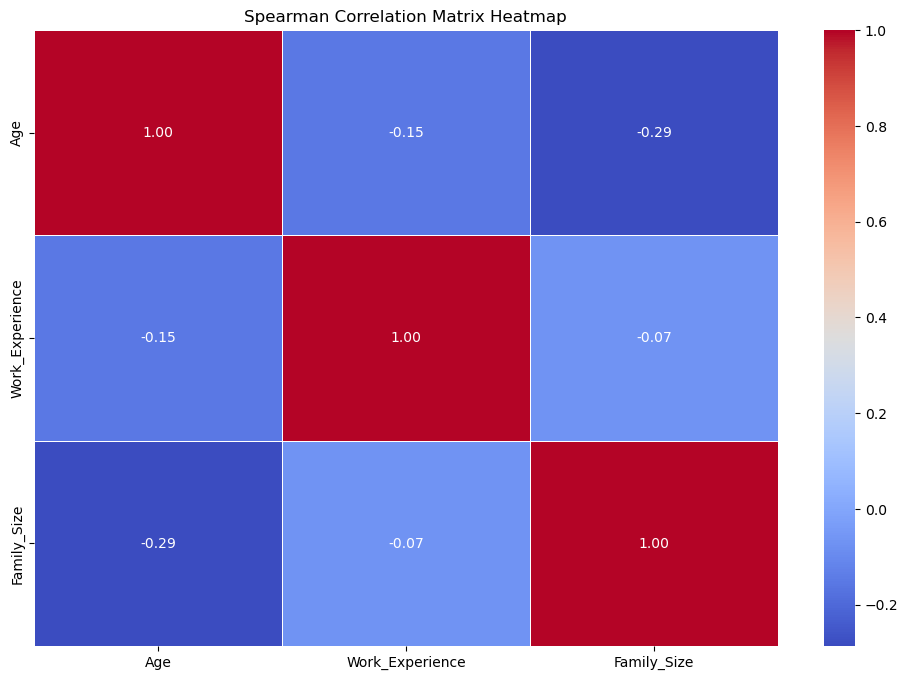

In [15]:
spearman_corr = numeric_data.corr(method='spearman')

# Visualisasi matriks korelasi dengan heatmap
# biar enaknya ngeliat
# ukuran mapnya
mp.figure(figsize=(12, 8))
# memvisualisasikan spearman ke mapnya dengan seaborn
sea.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
mp.title('Spearman Correlation Matrix Heatmap')
mp.show()

nah sekarang yang di atas 0.5 akan kita lihat dari VIF apakah mereka colinearity karena kalau mereka kolinear kayak 2 variabel yang sama tapi dapat 1 info yg Penting ( buang buang Waktu juga) bau baunya dari correlation yang kecil -0.29 harusnya multicolinearitynya juga kecil mari kita cek VIF.

In [16]:
multicolinearity_table = pd.DataFrame()

multicolinearity_table["Variable Name"] = numeric_data.columns

multicolinearity_table["Colinearity %"] = [variance_inflation_factor(numeric_data.values,i)
    for i in range(len(numeric_data.columns))]

multicolinearity_table

,Variable Name,Colinearity %
0,Age,2.649924
1,Work_Experience,1.427010
2,Family_Size,2.628699


kita bisa lihat kalau nilai VIF nya sangat kecil jadi harusnya tidak ada yang multicolinearity jadi kita bisa lanjut ke data preprocessing

# Data Preparetion

pertama kita mulai dari yg numerical :
kalau diperhatikan numerical variabel seperti age disini perlu kita scaling karena rangenya sangat besar takutnya nanti bobot nya besar di model. Sedangkan untuk working experience dan family size sepertinya masih bisa ga discale dikarenakan range yang jauh lebih kecil dari age dr 0-14 mentok

In [17]:
# kita pakai robust buat ngehindarin outliers karena scaler lain sensitif
scaler = RobustScaler()
customer_dataset_clean[["Age"]]= scaler.fit_transform(customer_dataset_clean[["Age"]])
# untuk test kita transform aja jangan sampai dia nyontek
test_dataset_clean['Age'] = scaler.transform(test_dataset_clean[['Age']])
customer_dataset_clean.head()

/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_4245/3943863392.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_4245/3943863392.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,-0.863636,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,Female,Yes,1.181818,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,1.181818,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,Male,Yes,0.681818,No,Artist,0.0,Average,2.0,Cat_6,C
6,Male,No,-0.409091,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


selanjutnya encoding buat semuanya tapi kita lihat dulu unique value dari semua data categorical agar kita tau mau nentuin apa encoder yang mau dipakai

In [18]:
for column in categorical_data.columns:
    print(f"{column}: {categorical_data[column].unique()}")

Gender: ['Male' 'Female']
Ever_Married: ['No' 'Yes']
Graduated: ['No' 'Yes']
Profession: ['Healthcare' 'Engineer' 'Lawyer' 'Artist' 'Doctor' 'Homemaker'
 'Entertainment' 'Marketing' 'Executive']
Spending_Score: ['Low' 'High' 'Average']
Var_1: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']
Segmentation: ['D' 'B' 'C' 'A']


oke disini kita pilih untuk
- label Enconder : gender, ever_married, dan graduated

hal ini dikarenakan ciri data mereka yang udah biner yes and no dimana jadinya 1 dan 0 nantinya

- One Hot Encoder : Profession dan var_1

hal ini dikarenakan profession tuh kayak ga ada urutan pasti jadi one hot encoder plg cocok

- Ordinal Encoder : spending score dan segmentation

nah ini ada urutan yang jelas atau pasti jadi kita kasih dia ordinal
segmentation 


In [19]:
# Label Encoder
label_encoder = LabelEncoder()
customer_dataset_clean['Gender'] = label_encoder.fit_transform(customer_dataset_clean['Gender'])
test_dataset_clean['Gender'] = label_encoder.transform(test_dataset_clean['Gender'])
customer_dataset_clean['Ever_Married'] = label_encoder.fit_transform(customer_dataset_clean['Ever_Married'])
test_dataset_clean['Ever_Married'] = label_encoder.transform(test_dataset_clean['Ever_Married'])
customer_dataset_clean['Graduated'] = label_encoder.fit_transform(customer_dataset_clean['Graduated'])
test_dataset_clean['Graduated'] = label_encoder.transform(test_dataset_clean['Graduated'])

/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_4245/98626991.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_4245/98626991.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_4245/98626991.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [20]:
# Ordinal Encoder
ordinal_encoding = OrdinalEncoder(categories = [['Low','High','Average']]).set_output(transform="pandas")

customer_dataset_clean['Spending_Score'] = ordinal_encoding.fit_transform(customer_dataset_clean[['Spending_Score']])
test_dataset_clean['Spending_Score'] = ordinal_encoding.transform(test_dataset_clean[['Spending_Score']])

/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_4245/4183134428.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_4245/4183134428.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
ordinal_encoding = OrdinalEncoder(categories = [['A','B','C','D']]).set_output(transform="pandas")

customer_dataset_clean['Segmentation'] = ordinal_encoding.fit_transform(customer_dataset_clean[['Segmentation']])
test_dataset_clean['Segmentation'] = ordinal_encoding.transform(test_dataset_clean[['Segmentation']])

train_y = pd.DataFrame(customer_dataset_clean['Segmentation'])
test_y = pd.DataFrame(test_dataset_clean['Segmentation'])

customer_dataset_clean = customer_dataset_clean.drop('Segmentation', axis=1)
test_dataset_clean = test_dataset_clean.drop('Segmentation', axis=1)

/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_4245/2594003306.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/k8/0jttqwyj0vdg5y3q78vqjy1c0000gn/T/ipykernel_4245/2594003306.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
# One hot Encoder
one_enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

profession_encoded = one_enc.fit_transform(customer_dataset_clean[['Profession']])
profession_encoded.columns = one_enc.get_feature_names_out(['Profession'])

profession_test_encoded = one_enc.transform(test_dataset_clean[['Profession']])
profession_test_encoded.columns = one_enc.get_feature_names_out(['Profession'])

var_1_encoded = one_enc.fit_transform(customer_dataset_clean[['Var_1']])
var_1_encoded.columns = one_enc.get_feature_names_out(['Var_1'])

var_1_test_encoded = one_enc.transform(test_dataset_clean[['Var_1']])
var_1_test_encoded.columns = one_enc.get_feature_names_out(['Var_1'])

# Drop and Merge For Categorical data Train
customer_dataset_clean = customer_dataset_clean.drop('Profession', axis=1)
customer_dataset_clean = customer_dataset_clean.drop('Var_1', axis=1)
customer_dataset_clean = pd.concat([customer_dataset_clean, profession_encoded,var_1_encoded], axis=1)

# Drop and Merge For Categorical Test Data
test_dataset_clean = test_dataset_clean.drop('Profession', axis=1)
test_dataset_clean = test_dataset_clean.drop('Var_1', axis=1)
test_x = pd.concat([test_dataset_clean, profession_test_encoded,var_1_test_encoded], axis=1)

In [23]:
customer_dataset_clean

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,-0.863636,0,1.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,1,1.181818,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,1.181818,1,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1,1,0.681818,0,0.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1,0,-0.409091,1,1.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,1,1,0.000000,1,0.0,1.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8064,1,0,-0.272727,0,3.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8065,0,0,-0.363636,1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8066,0,0,-0.636364,1,1.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
test_x

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,1,-0.227273,1,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,-0.181818,1,8.0,2.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.818182,0,11.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1,1,0.272727,1,0.0,1.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1,1,0.909091,1,5.0,0.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,0,0,-0.272727,1,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2622,1,0,-0.545455,0,9.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2623,0,0,-0.272727,1,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2625,1,1,0.272727,1,1.0,1.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# kalau udah encoding dan scaling sekarang waktunya merapikan dan menemukan train data x , test data x, train data y, test data y

In [25]:
train_y

,Segmentation
0,3.0
2,1.0
3,1.0
5,2.0
6,2.0
...,...
8062,1.0
8064,3.0
8065,3.0
8066,1.0


In [26]:
test_y

,Segmentation
0,1.0
1,0.0
3,1.0
5,2.0
6,3.0
...,...
2621,3.0
2622,1.0
2623,0.0
2625,2.0


In [27]:
test_x

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,0,1,-0.227273,1,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,-0.181818,1,8.0,2.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.818182,0,11.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1,1,0.272727,1,0.0,1.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1,1,0.909091,1,5.0,0.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,0,0,-0.272727,1,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2622,1,0,-0.545455,0,9.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2623,0,0,-0.272727,1,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2625,1,1,0.272727,1,1.0,1.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
train_x = customer_dataset_clean
train_x

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,-0.863636,0,1.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,1,1.181818,1,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,1.181818,1,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1,1,0.681818,0,0.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1,0,-0.409091,1,1.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,1,1,0.000000,1,0.0,1.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8064,1,0,-0.272727,0,3.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8065,0,0,-0.363636,1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8066,0,0,-0.636364,1,1.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# TRAIN THE MODEL WITH XGBOOST

In [ ]:
num_classes = len(train_y['Segmentation'].unique())  

train_y = train_y.squeeze()
xgb_model = xgb.XGBClassifier(
    n_estimators=200,       
    max_depth=3,            
    learning_rate=0.1,      
    random_state=42,       
    objective='multi:softmax',  
    num_class= num_classes  
)


xgb_model.fit(train_x, train_y)
y_pred_xgb = xgb_model.predict(test_x)


accuracy = accuracy_score(test_y, y_pred_xgb)
print(f"Accuracy: {accuracy:.2f}")

# CLASSIFICATION REPORT WITH XGBOOST

In [ ]:
print("Classification Report:")
print(classification_report(test_y, y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.35      0.27      0.31       692
         1.0       0.25      0.23      0.24       450
         2.0       0.25      0.35      0.30       381
         3.0       0.42      0.44      0.43       631

    accuracy                           0.33      2154
   macro avg       0.32      0.33      0.32      2154
weighted avg       0.33      0.33      0.33      2154



# GRID SEARCH WITH XGBOOST

In [ ]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, random_state=42)
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

scorer = make_scorer(recall_score, average='macro')

grid_search = GridSearchCV(xgb_model, param_grid, scoring=scorer, cv=3, verbose=1)
grid_search.fit(train_x, train_y)

print("Best Parameters:", grid_search.best_params_)
print("Best Macro Recall:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(test_x)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Macro Recall: 0.5302258547694466


# CONFUSSION MATRIX WITH XGBOOST

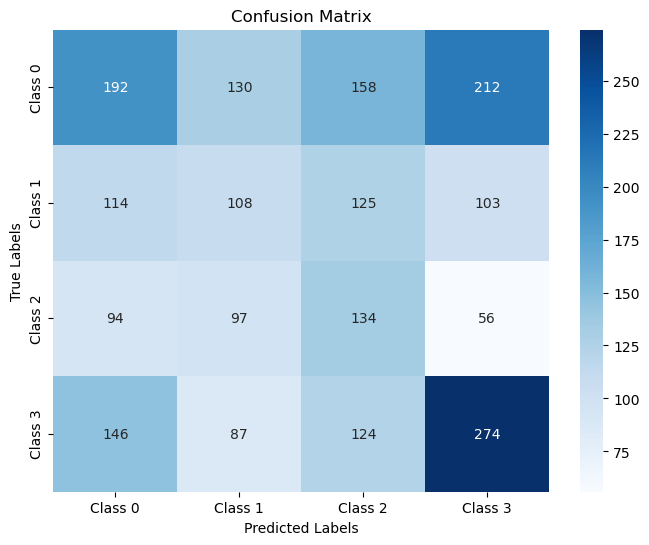

In [ ]:
y_pred = best_model.predict(test_x)

conf_matrix = confusion_matrix(test_y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)], yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Untuk customer segmentation, macro recall lebih kita prioritaskan karena tujuan utama adalah memastikan model mampu menangkap sebanyak mungkin segmen pelanggan yang relevan, meskipun ada beberapa kesalahan dalam prediksi. 

dari confusion matrix kita masih bisa melihat model yang masih banyak confuse dalam memprediksi data kita terlihat angka yang sangat besar di predicted tapi bukan true sepertu 158,212,dll.Hal ini dikarenakan data yang cukup imbalance di berbagai kolom atau variabel nya jadi menyebabkan model tidak bisa mempredict sebaik itu. Walaupun begitu model juga cukup bagus dalam memprediksi yang benar seperti 205 di 1 dan 272 di 3. Walaupun begini belum bisa dibilang model kita udah sempurna. Setelah dilakukan grid search pun yang di raih hanya 53% macro recall terbesar. Jadi kesimpulan yang kita ambil iyes saya tau pak modelnya jelek bgt di satu sisi. Tetapi setelah dilakukan grid search jauh lebih better dan macro recall sudah ,menjadi indicator terbesar dimana yang plg penting dr model kita adalah seberapa banyak model bisa ngeidentify customer beneran berada di segmen itu.

kita lihat dengan random forest

# TRAIN MODEL WITH RANDOM FOREST 

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,        
    max_depth=3,             
    random_state=42          
)

rf_model.fit(train_x, train_y)

y_pred_rf = rf_model.predict(test_x)

accuracy = accuracy_score(test_y, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.33


# GRID SEARCH WITH RANDOMFOREST

In [45]:
param_grid_rf = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [3, 5, 7, None], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False] 
}

scorer = make_scorer(recall_score, average='macro')

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, scoring=scorer, cv=3, verbose=1, n_jobs=-1)
grid_search_rf.fit(train_x, train_y)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best Macro Recall:", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(test_x)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Macro Recall: 0.5341293046248473


# CONFUSSION MATRIX WITH RANDOMFOREST

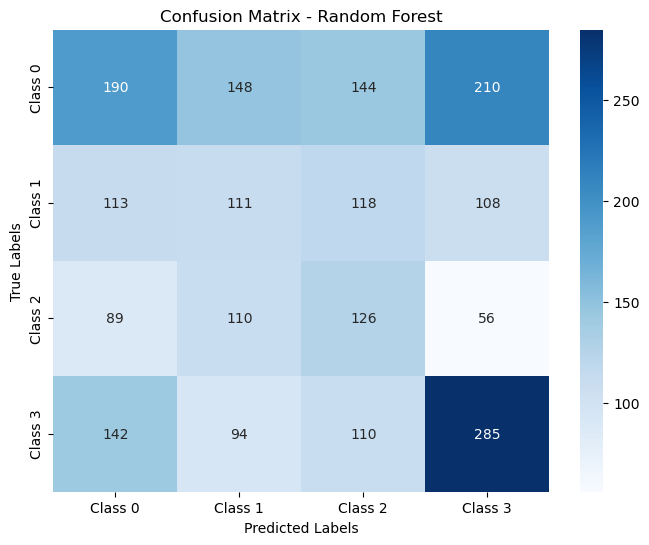

In [46]:
conf_matrix_rf = confusion_matrix(test_y, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)], yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ANALISA DAN KESIMPULAN

nah ini untuk model random forest, disini kita lihat kurang lebih hasilnya mirip dengan xgboost dengan 0.534 di randomforest dan 0.530 di xgboost. Dengan macro recall randomforest yang lebih tinggi maka dipastikan kalau random forest akan lebih bagus 0.04 % of the time dalam kasus customer segmentation ini. Tapi perlu diinget kembali data yang ada seperti di Familysize, Spending Score, profession,dll skewed atau inbalance sehingga ini mempengaruhi persentase dari model.

Kesimpulannya :
dalam membandingkan 2 model ini kita bisa lihat kalau randomforest lebih bagus dikarenakan hasil macro recall yang sedikit lebih bagus dari XG BOOST ditambah dengan sifat bawaan randomforest dimana stabilitas dan mudah untuk dipakai. Namun balik lagi kalau kita mau hypertuning lebih jauh untuk emndapatkan hasil yang lebih bagus dari sekarang XGboost is the choice. 


# 3. XGBoost is a boosting algorithm based on tree-based models. It has a mechanism to display 3 types of feature importance: (1) gain, (2) weight, & (3) coverage. Explain each of them (max. 3 points)

Gain:
gain biasanya digunain untuk mengukur kontribusi setiap fitur untuk peningkatan daya prediksi model. gain jyga menjelaskan seberapa besar fitur tersebut berkontribusi untuk emnignkatkan kinerja model saat digunakan. Nilai gain yang lebih besar menunjukkan bahwa fitur tersebut memainkan peran yang lebih penting dalam mengurangi loss.

Weight:
Weight biasanya mengacu pada berapa banyak jumlah fitur digunakan untuk membagi data di seluruh pohon dalam model. Ini yang biasanya jadi hitungan seberapa sering fitur muncul dalam pengambilan keputusan di seluruh pohon.
PERLU DI NOTE KALAU Fitur bisa aja sering muncul dalam pembagian, tetapi tidak selalu berkontribusi besar terhadap kinerja model.

Coverage:
coverage adalah "sebaran" atau "jangkauan" fitur di seluruh dataset. Coverage bisanaya dipakai untuk memahami seberapa banyak data yang dipengaruhi oleh pembagian fitur. Semakin tinggi coverage, semakin relevan fitur tersebut bagi sebagian besar dataset.

kesimpulannya atau simpelnya gini:
Gain adalah ukuran atau porsinya terkait dengan pentingnya fitur dalam meningkatkan kinerja model.
Weight seberapa sering fitur digunakan atau nongol dalam pengambilan keputusan.
Coverage itu berapa banyak instance yang dipengaruhi oleh fitur.

# 4. There is a joke among data scientists, "when in doubt, use XGBoost" - Owen Zhang. State the reasons and in what scenarios will XGBoost perform badly! (max. 3 points)

XGBoost tuh bisa dibilang dapat diandalkan karena bisa mendapatkan hasil yang bagus, hal ini ya dikarenakan kemampuan dari XG boost sendiri:
1. hyperparameter tuning yang mendalam sehingga gampang bangat kita mau dapatin hasil yang sesuai kita mau
2. XGBoost juga bagus menangani data yang banyak dengan cepat ( berry fleksibel and fast respond ga kayak mantan)
3. XGBoost unggul dalam menangani data terstruktur/tabular karena dia bisa memodelkan interaksi kompleks dan hubungan non-linear (berry useful)
4. xgboost juga ada regulasi agar model tidak terlalu overfit terhadap data yang ada.

Namun sayangnya ternyata oh ternyata pemirsa, XGboost memiliki beberapa skenario dimana tidak bagus dipakai:
- saat dihadapkan dengan dimensi tinggi, sistem XGboost kan decision tree. Dimana kalau dimensi tinggi dia akan susah untuk mengevaluasi semua fiturnya pada split yang ada ini ngebuat dia lebih lambat dan efisien.
- Data noise bisa menyebabkan model overfit walaupun ada regulasi.